In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport models

# Load the TensorBoard notebook extension
%load_ext tensorboard

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Hunch_lsplot
reload set for module  models
reload set for module  Dummy_g1data


In [6]:
def tensorboard_log(name=None):
    import datetime
    if name is None:
        return []
    else:
        name = name+'_'
    log_base_dir = ipysh.abs_srcdir+"/jpnb/logs"
    log_dir = log_base_dir+"/fit/" + name + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return [ tf.keras.callbacks.TensorBoard(log_dir=log_dir, update_freq='batch') ]

In [ ]:
# %tensorboard --logdir {log_base_dir} --help

# CONVOLUTIONAL VAE

In [7]:
import Dummy_g1data as g1
def train_dummy(model, data=None, epoch=40, batch=200, loss_factor=1e-3, log_name=None):
    if data is None:
        data = g1.Dummy_g1data(size=15)
    ds_train = data.ds_array.batch(batch).map(lambda x,y: (x,x)).take(100)
    ds_test  = data.ds_array.batch(batch).map(lambda x,y: (x,x)).take(10)
    model.fit(ds_train, epochs=epoch, validation_data=ds_test, callbacks=tensorboard_log(log_name))

In [8]:
cae1 = models.CAEFIT1(latent_dim=2, feature_dim=30, dprate=0.3, scale=2, beta=1.)

CAEFIT1 (newloss) ready:


In [9]:
train_dummy(cae1, batch=200, epoch=10, loss_factor=1e-3, log_name='beta_1.0')

Epoch 1/10
100/100 [==============================] - 13s 131ms/step - loss: 16.1495 - accuracy: 0.1317 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 11s 112ms/step - loss: 14.5197 - accuracy: 0.6877 - val_loss: 14.2678 - val_accuracy: 0.6905
Epoch 3/10
100/100 [==============================] - 11s 112ms/step - loss: 14.1256 - accuracy: 0.6927 - val_loss: 14.0158 - val_accuracy: 0.6805
Epoch 4/10
100/100 [==============================] - 11s 114ms/step - loss: 13.9588 - accuracy: 0.6915 - val_loss: 13.8511 - val_accuracy: 0.7085
Epoch 5/10
100/100 [==============================] - 11s 110ms/step - loss: 13.8515 - accuracy: 0.6935 - val_loss: 13.7985 - val_accuracy: 0.6955
Epoch 6/10
100/100 [==============================] - 11s 111ms/step - loss: 13.7537 - accuracy: 0.6950 - val_loss: 13.7535 - val_accuracy: 0.6920
Epoch 7/10
100/100 [==============================] - 11s 113ms/step - loss: 13.7502 - accuracy: 0.6975 - val_l

In [18]:
cae2 = models.CAEFIT1(latent_dim=2, feature_dim=30, dprate=0.3, scale=2, beta=0.002)

CAEFIT1 (newloss) ready:


In [19]:
train_dummy(cae2, batch=200, epoch=3, loss_factor=1e-3, log_name='beta_0.002')

Epoch 1/3
100/100 [==============================] - 13s 126ms/step - loss: 16.4282 - accuracy: 0.3253 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
100/100 [==============================] - 11s 110ms/step - loss: 15.0403 - accuracy: 0.6863 - val_loss: 14.9583 - val_accuracy: 0.6895
Epoch 3/3
100/100 [==============================] - 11s 109ms/step - loss: 14.7087 - accuracy: 0.6846 - val_loss: 14.4889 - val_accuracy: 0.6895


In [ ]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(cae1)
p.set_data(g1.Dummy_g1data(size=15), counts=4000)
p.plot(notebook_url='http://172.17.0.2:8888')

In [ ]:
from bokeh.io import show, output_notebook
output_notebook()

p2 = Hplt.LSPlotBokeh()
p2.set_model(cae2)
p2.set_data(g1.Dummy_g1data(size=15), counts=4000)
p2.plot(notebook_url='http://172.17.0.2:8888')

# Train on data

In [20]:
qsh = Htls.QSH_Dataset()
qsh.dim = 15
qsh.load(ipysh.abs_builddir+'/te_db_r15_clean.npy')
qsh.set_null(np.nan)

In [25]:
# def train(model, data, epoch=40, batch=400, loss_factor=1e-4):     
#     # optimizer = tf.keras.optimizers.Adam(learning_rate=loss_factor)
#     # cae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
#     ds_x = tf.slice(data['prel'],[0,0],[-1,15])
#     ds_y = tf.slice(data['te'],[0,0],[-1,15])
#     ds = tf.concat([ds_x,ds_y], axis=1)
#     # dataset  = tf.data.Dataset.from_tensor_slices(ds).batch(batch)
#     model.fit(ds, ds, epochs=epoch, batch_size=batch)    
    
def train(model, data, epoch=40, batch=400, loss_factor=1e-4, log_name=None):     
    ds = data.ds_array.batch(batch).map(lambda x,y: (x,x))
    ds_test  = ds.take(2)
    ds_train = ds.skip(2)
    model.fit(ds_train, epochs=epoch, validation_data=ds_test, callbacks=tensorboard_log(log_name)) 

In [29]:
cae = models.CAEFIT1(latent_dim=2, feature_dim=30, dprate=0.3, scale=2, beta=1.)

CAEFIT1 (newloss) ready:


In [30]:
train(cae, qsh, batch=200, epoch=10, loss_factor=1e-3, log_name='qsh_1.0')

Epoch 1/10
306/306 [==============================] - 24s 78ms/step - loss: 17.4663 - accuracy: 0.7119 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
306/306 [==============================] - 22s 72ms/step - loss: 17.2708 - accuracy: 0.9943 - val_loss: 17.2415 - val_accuracy: 0.9975
Epoch 3/10
306/306 [==============================] - 22s 73ms/step - loss: 17.2468 - accuracy: 0.9943 - val_loss: 17.2310 - val_accuracy: 0.9975
Epoch 4/10
306/306 [==============================] - 22s 71ms/step - loss: 17.2406 - accuracy: 0.9943 - val_loss: 17.2276 - val_accuracy: 0.9975
Epoch 5/10
306/306 [==============================] - 23s 74ms/step - loss: 17.2384 - accuracy: 0.9943 - val_loss: 17.2254 - val_accuracy: 0.9975
Epoch 6/10
306/306 [==============================] - 22s 71ms/step - loss: 17.2367 - accuracy: 0.9943 - val_loss: 17.2242 - val_accuracy: 0.9975
Epoch 7/10
306/306 [==============================] - 22s 71ms/step - loss: 17.2358 - accuracy: 0.9943 - val_loss: 17

KeyboardInterrupt: 

In [31]:
from bokeh.io import show, output_notebook
output_notebook()

p2 = Hplt.LSPlotBokeh()
p2.set_model(cae)
p2.set_data(qsh, counts=4000)
p2.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

W0805 15:19:41.705402 139976687298368 deprecation.py:323] From /home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:124: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


VAE plot


In [ ]:
cae.save('step7_cae1_r15')

In [ ]:
# cae.load('step7_cae_r15')

In [32]:
import copy
qsh_clean2 = copy.deepcopy(qsh)

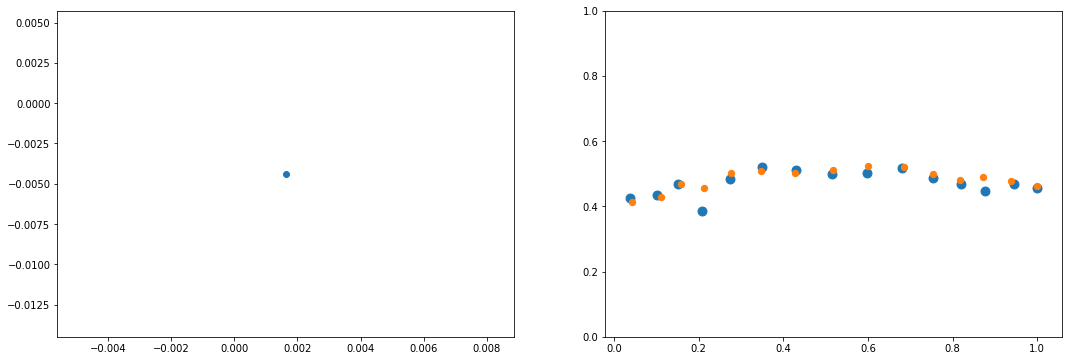

In [64]:
fig = plt.figure('test_curve',figsize=(18, 6))
plt.clf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
# ax1.set_xlim(-2.,2.)
ax2.set_ylim(0.,1.)

qsh_clean2.shuffle()
for xy in qsh_clean2.ds_array.take(1):
    
    xy,_ = xy
    x,y = tf.split(xy,2)
    ax2.scatter(x,y,s=80)
    m,v  = cae.encode([xy])
    gpt = m[0].numpy()
    ax1.scatter(gpt[0],gpt[1])
    
    XY = cae.decode(m,apply_sigmoid=True)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())
    ax2.scatter(X,Y,s=40)
    